# **SMS** **SPAM** **Classification**







# Download the dataset "spam.csv"
# Import required library





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

#Read the Dataset





In [2]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#  Preprocessing the Dataset

In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [7]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

#Create Model & Add Layers

In [8]:
inputs = Input(shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(128)(layer)
layer = Dense(128)(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1)(layer)
layer = Activation('sigmoid')(layer)
model = Model(inputs=inputs,outputs=layer)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129   

#  Compile the Model

In [10]:
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

#  Fit the Model

In [11]:
history = model.fit(sequences_matrix,Y_train,batch_size=20,epochs=15,
          validation_split=0.2)

Epoch 1/15
168/168 [==============================] - 10s 16ms/step - loss: 0.2235 - accuracy: 0.9246 - val_loss: 0.0524 - val_accuracy: 0.9856
Epoch 2/15
168/168 [==============================] - 2s 11ms/step - loss: 0.0457 - accuracy: 0.9877 - val_loss: 0.0351 - val_accuracy: 0.9904
Epoch 3/15
168/168 [==============================] - 2s 11ms/step - loss: 0.0265 - accuracy: 0.9934 - val_loss: 0.0458 - val_accuracy: 0.9868
Epoch 4/15
168/168 [==============================] - 2s 10ms/step - loss: 0.0139 - accuracy: 0.9964 - val_loss: 0.0434 - val_accuracy: 0.9868
Epoch 5/15
168/168 [==============================] - 2s 11ms/step - loss: 0.0104 - accuracy: 0.9976 - val_loss: 0.0539 - val_accuracy: 0.9868
Epoch 6/15
168/168 [==============================] - 2s 10ms/step - loss: 0.0078 - accuracy: 0.9979 - val_loss: 0.0878 - val_accuracy: 0.9821
Epoch 7/15
168/168 [==============================] - 2s 10ms/step - loss: 0.0072 - accuracy: 0.9973 - val_loss: 0.0639 - val_accuracy: 0.988

In [12]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

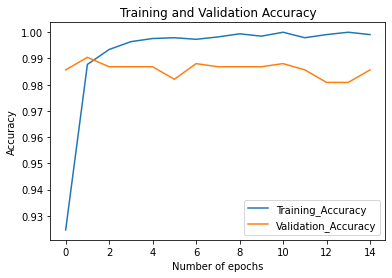

In [13]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'Accuracy')

#  Save the Model

In [14]:
model.save('A4Spam_sms_classifier.h5')


#  Test the Model

In [15]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [16]:
accuracy1 = model.evaluate(test_sequences_matrix,Y_test)

44/44 [==============================] - 0s 7ms/step - loss: 0.1204 - accuracy: 0.9864


In [17]:
print(' loss: {:0.4f}'.format(accuracy1[0]))
print(' Accuracy: {:0.4f}'.format(accuracy1[1]))

 loss: 0.1204
 Accuracy: 0.9864
